In [8]:
import matplotlib.pyplot as plt  # For plots
import seaborn  # For prettier plots
import time  # Deal with time stamps
import datetime  # Deal with time stamps again
import pandas  # Data stuff
import numpy as np  # For fitting data
import matplotlib.dates as mdates  # For handling dates
%matplotlib inline

# Strategies by date

In [9]:
df = pandas.read_csv('data', header=None, names=['Dates', 'Strategies', 'Hash', 'Author'])
times = [time.strptime(time.asctime(time.gmtime(float(d)))) for d in df['Dates']]
dates = [datetime.datetime.fromtimestamp(time.mktime(t)) for t in times]
df['Dates'] = dates
df['AbsStrategies'] = [max(n, max(df['Strategies'][:i+1])) for i, n in enumerate(df['Strategies'])]

authors = {
"vince": "Vincent Knight",
"Vince Knight": "Vincent Knight",
"Vincent Knight": "Vincent Knight",
"Karol M. Langner": "Karol M. Langner",
"Jason Young": "Jason Young",
"jasonyoung": "Jason Young",
"Marc Harper":  "Marc Harper",
"Marc Harper, PhD": "Marc Harper",
"Owen Campbell": "Owen Campbell",
"geraint": "Geraint Palmer",
"slavinp": "Paul Slavin",
"slavinp": "Paul Slavin",
"Martin Chorley": "Martin Chorley",
"Martin": "Martin Jones",
"mojones": "Martin Jones",
"martin": "Martin Jones"}

df['Author'] = [authors.get(author, author) for author in df['Author']]

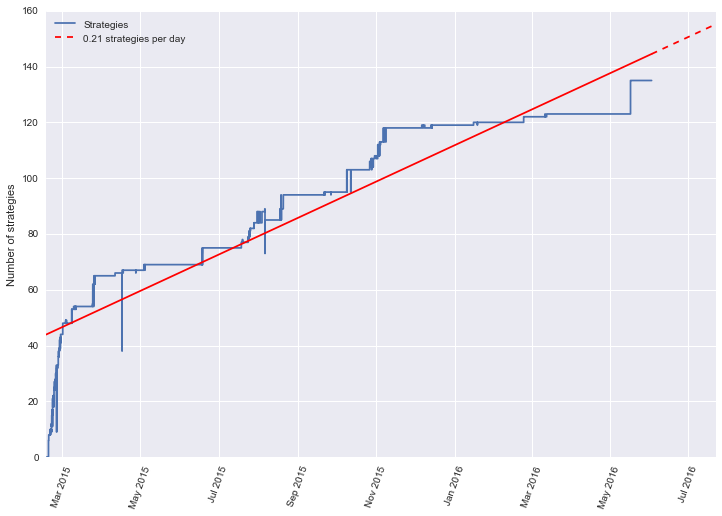

In [10]:
x = mdates.date2num(list(df.Dates))
degree = 1
fit = np.polyfit(x, df.Strategies, degree)
line = np.poly1d(fit)
numerical_dates = np.linspace(x.min(), x.max())

projection = 50
project_x = np.linspace(numerical_dates[-1], numerical_dates[-1] + projection, projection)

plt.figure(figsize=(12, 8))

plt.step(df.Dates, df['Strategies'], where='post')
plt.plot(numerical_dates, line(numerical_dates), 'r')

plt.plot(project_x, line(project_x), 'r', linestyle='dashed', label='{0:.2f} strategies per day'.format(line[1]))
plt.xticks(rotation=70);

plt.ylabel('Number of strategies')
plt.legend(loc=2)
plt.savefig('actual_number_of_strategies.pdf');

The slope of the line:

In [11]:
line[1]

0.21301540404380545

This happens over

In [12]:
int((df.Dates.iloc[-1] - df.Dates.iloc[0]).days)

472

days.

Here is the same analysis but ignoring a dip in the number of strategies (due to a commit that perhaps removed some strategies temporarily).

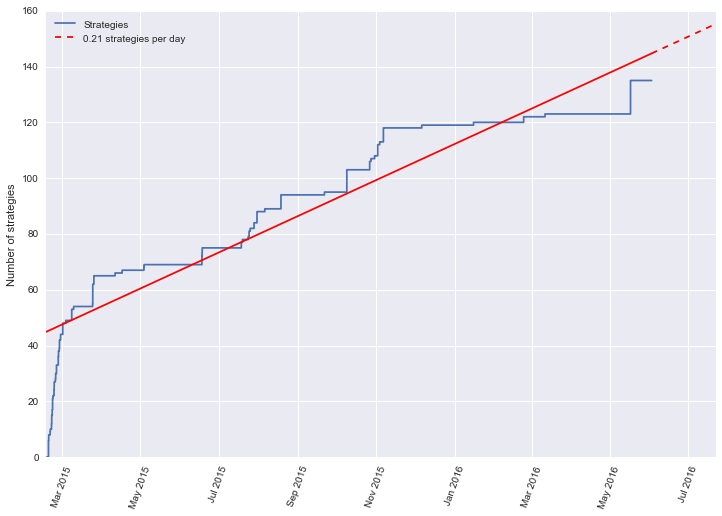

In [13]:
x = mdates.date2num(list(df.Dates))
degree = 1
fit = np.polyfit(x, df.AbsStrategies, degree)
line = np.poly1d(fit)
numerical_dates = np.linspace(x.min(), x.max())

projection = 50
project_x = np.linspace(numerical_dates[-1], numerical_dates[-1] + projection, projection)

plt.figure(figsize=(12, 8))

plt.step(df.Dates, df['AbsStrategies'], where='post', label='Strategies')
plt.plot(numerical_dates, line(numerical_dates), 'r')

plt.plot(project_x, line(project_x), 'r', linestyle='dashed', label='{0:.2f} strategies per day'.format(line[1]))
plt.xticks(rotation=70);

plt.ylabel('Number of strategies')
plt.legend(loc=2)
plt.savefig('number_of_strategies.pdf');

Without the fit:

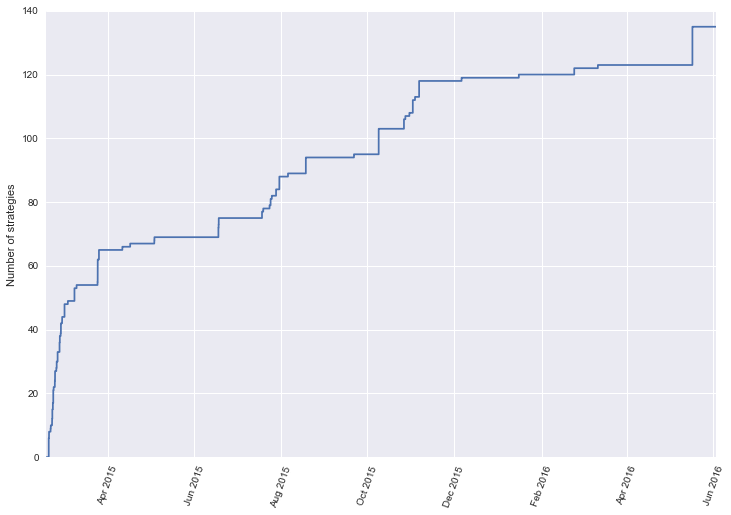

In [15]:
x = mdates.date2num(list(df.Dates))


plt.figure(figsize=(12, 8))

plt.step(df.Dates, df['AbsStrategies'], where='post', label='Strategies')

plt.xticks(rotation=70);

plt.ylabel('Number of strategies')
plt.savefig('number_of_strategies.pdf');

Let us try and fit an ARIMA model.

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
order = (2, 1, 2)
model = ARIMA(df.Strategies.map(float), order, freq='D', dates=df['Dates'])
model = model.fit()

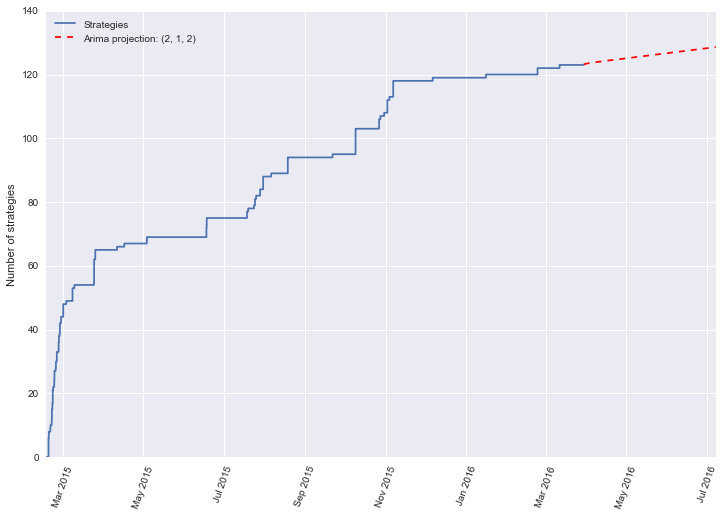

In [11]:
x = mdates.date2num(list(df.Dates))
degree = 1
fit = np.polyfit(x, df.AbsStrategies, degree)
line = np.poly1d(fit)
numerical_dates = np.linspace(x.min(), x.max())

projection = 100
project_x = np.linspace(numerical_dates[-1], numerical_dates[-1] + projection, projection)

plt.figure(figsize=(12, 8))

plt.step(df.Dates, df['AbsStrategies'], where='post', label='Strategies')
#plt.plot(numerical_dates, line(numerical_dates), 'r')

plt.plot(project_x, model.forecast(projection)[0], 'r', linestyle='dashed', label='Arima projection: {}'.format(order))
plt.xticks(rotation=70);

plt.ylabel('Number of strategies')
plt.legend(loc=2)
plt.savefig('number_of_strategies_with_arima_projection.pdf');

Find contributions by author.

In [30]:
df['Contributions'] = df.Strategies.diff()

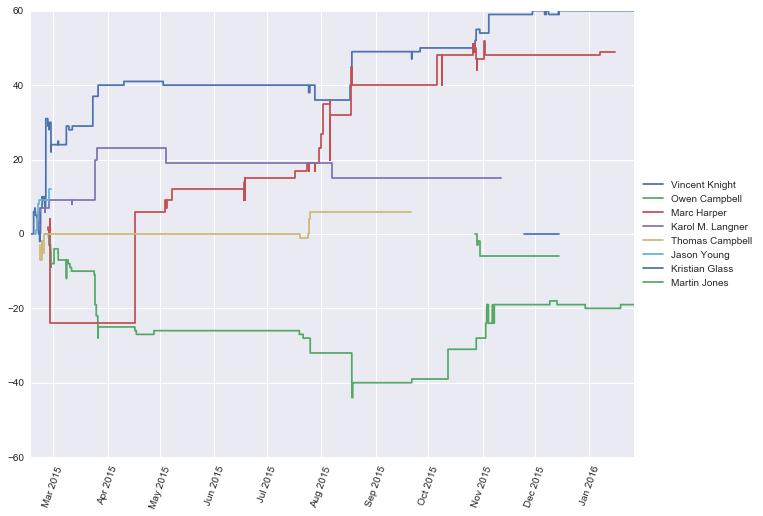

In [31]:
nbr_of_devs = 8

plt.figure(figsize=(12, 8))


ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])


devs = df['Author'].value_counts().index[:nbr_of_devs]
for author in devs:
    tmp_df = df[(df.Author == author)]

    try:
        plt.step(list(tmp_df.Dates), tmp_df.Contributions.cumsum(), label=author)

        plt.xticks(rotation=70)
    except KeyError:
        print(author)
        
ax.legend(loc='center left', bbox_to_anchor=(1, .5));

plt.savefig('contributions_{}_developers.pdf'.format(nbr_of_devs));

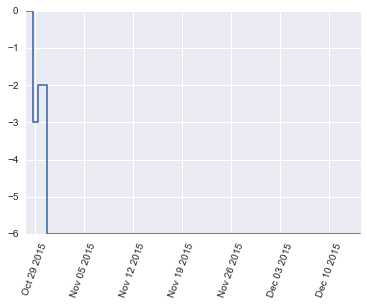

In [32]:
tmp_df = df[(df.Author == "Martin Jones")]
plt.figure()
plt.step(list(tmp_df.Dates), tmp_df.Contributions.cumsum(), label=author)
plt.xticks(rotation=70);

In [33]:
tmp_df

,Dates,Strategies,Hash,Author,AbsStrategies,Contributions
1771,2015-10-27 16:57:16,104,7b73b9f761145544a3a47a9b974c8e9037df4899,Martin Jones,106,0
1772,2015-10-27 17:02:22,104,64dd7ae8a916b6eb7e505b2410121674d1943c66,Martin Jones,106,0
1773,2015-10-27 17:02:45,104,b7ef81dd3387d03d120f1e815ebe77e7022313df,Martin Jones,106,0
1796,2015-10-28 16:14:27,104,ef31c86264ee837b1f9ab407a7a5ac89133604dc,Martin Jones,107,0
1798,2015-10-28 16:37:45,104,12f97367d4637ff31e8bc7e4b25cb7e5919e2268,Martin Jones,107,0
1802,2015-10-28 18:24:53,104,a80b3b98359590f71f00cb155f7e04a85a78b1aa,Martin Jones,107,0
1807,2015-10-29 12:01:15,104,c56722b8755d23870b69005f0c84a06088cc0776,Martin Jones,107,-3
1808,2015-10-29 12:08:28,104,4ba047d3be2396be99e587aa90573d9a5df93e00,Martin Jones,107,0
1809,2015-10-29 12:14:15,104,eb8a01525eb5f996b1ac3ac51522929e214a03e7,Martin Jones,107,0
1813,2015-10-30 15:14:36,108,0c5b8af512885abb177d387b0f55db8f3baf1e39,Martin Jones,108,1
